## Summer Analytics 2023
# Capstone project

In [103]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, QuantileTransformer, PowerTransformer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [104]:
# import datasets
train = pd.read_csv('Train_Data.csv')
test = pd.read_csv('Test_Data.csv')

In [105]:
# print the first 5 rows
train.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [106]:
# Get the counts of unique values of Target Variable
train['Healthy'].value_counts()

1    16300
0     9620
Name: Healthy, dtype: int64

In [107]:
# print the info of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID1                        25920 non-null  int64  
 1   Specific ailments          25920 non-null  int64  
 2   ID2                        25920 non-null  int64  
 3   Food preference            25910 non-null  object 
 4   Age                        25920 non-null  int64  
 5   BMI                        25920 non-null  float64
 6   Smoker?                    25920 non-null  object 
 7   Living in?                 25920 non-null  object 
 8   Any heriditary condition?  25920 non-null  object 
 9   Follow Diet                24947 non-null  float64
 10  Physical activity          24947 non-null  float64
 11  Regular sleeping hours     24947 non-null  float64
 12  Alcohol consumption        24947 non-null  float64
 13  Social interaction         24947 non-null  flo

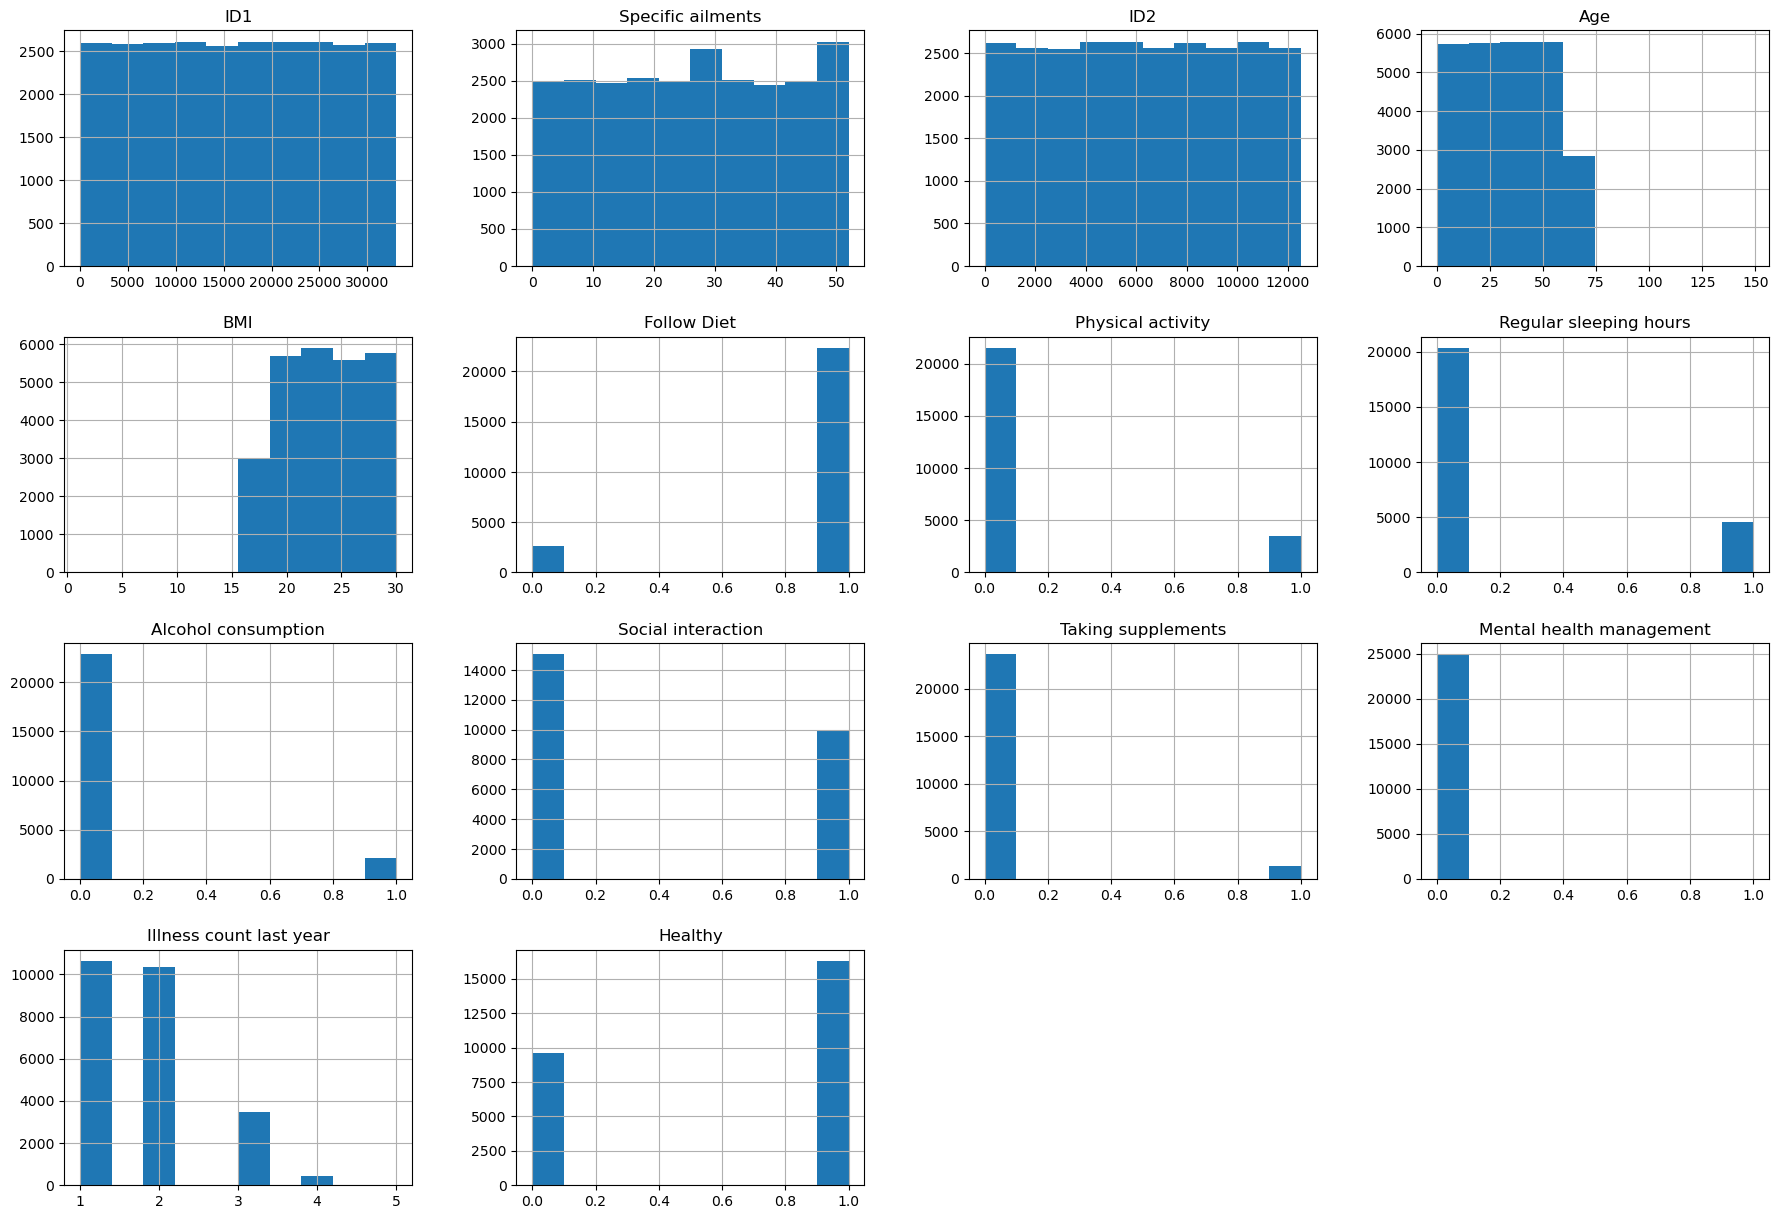

In [108]:
# Plotting histograms
train.hist(train.columns, figsize=(22, 15));

C:\Users\shrig\AppData\Local\Temp\ipykernel_11756\81551245.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap="RdBu_r", annot=True)


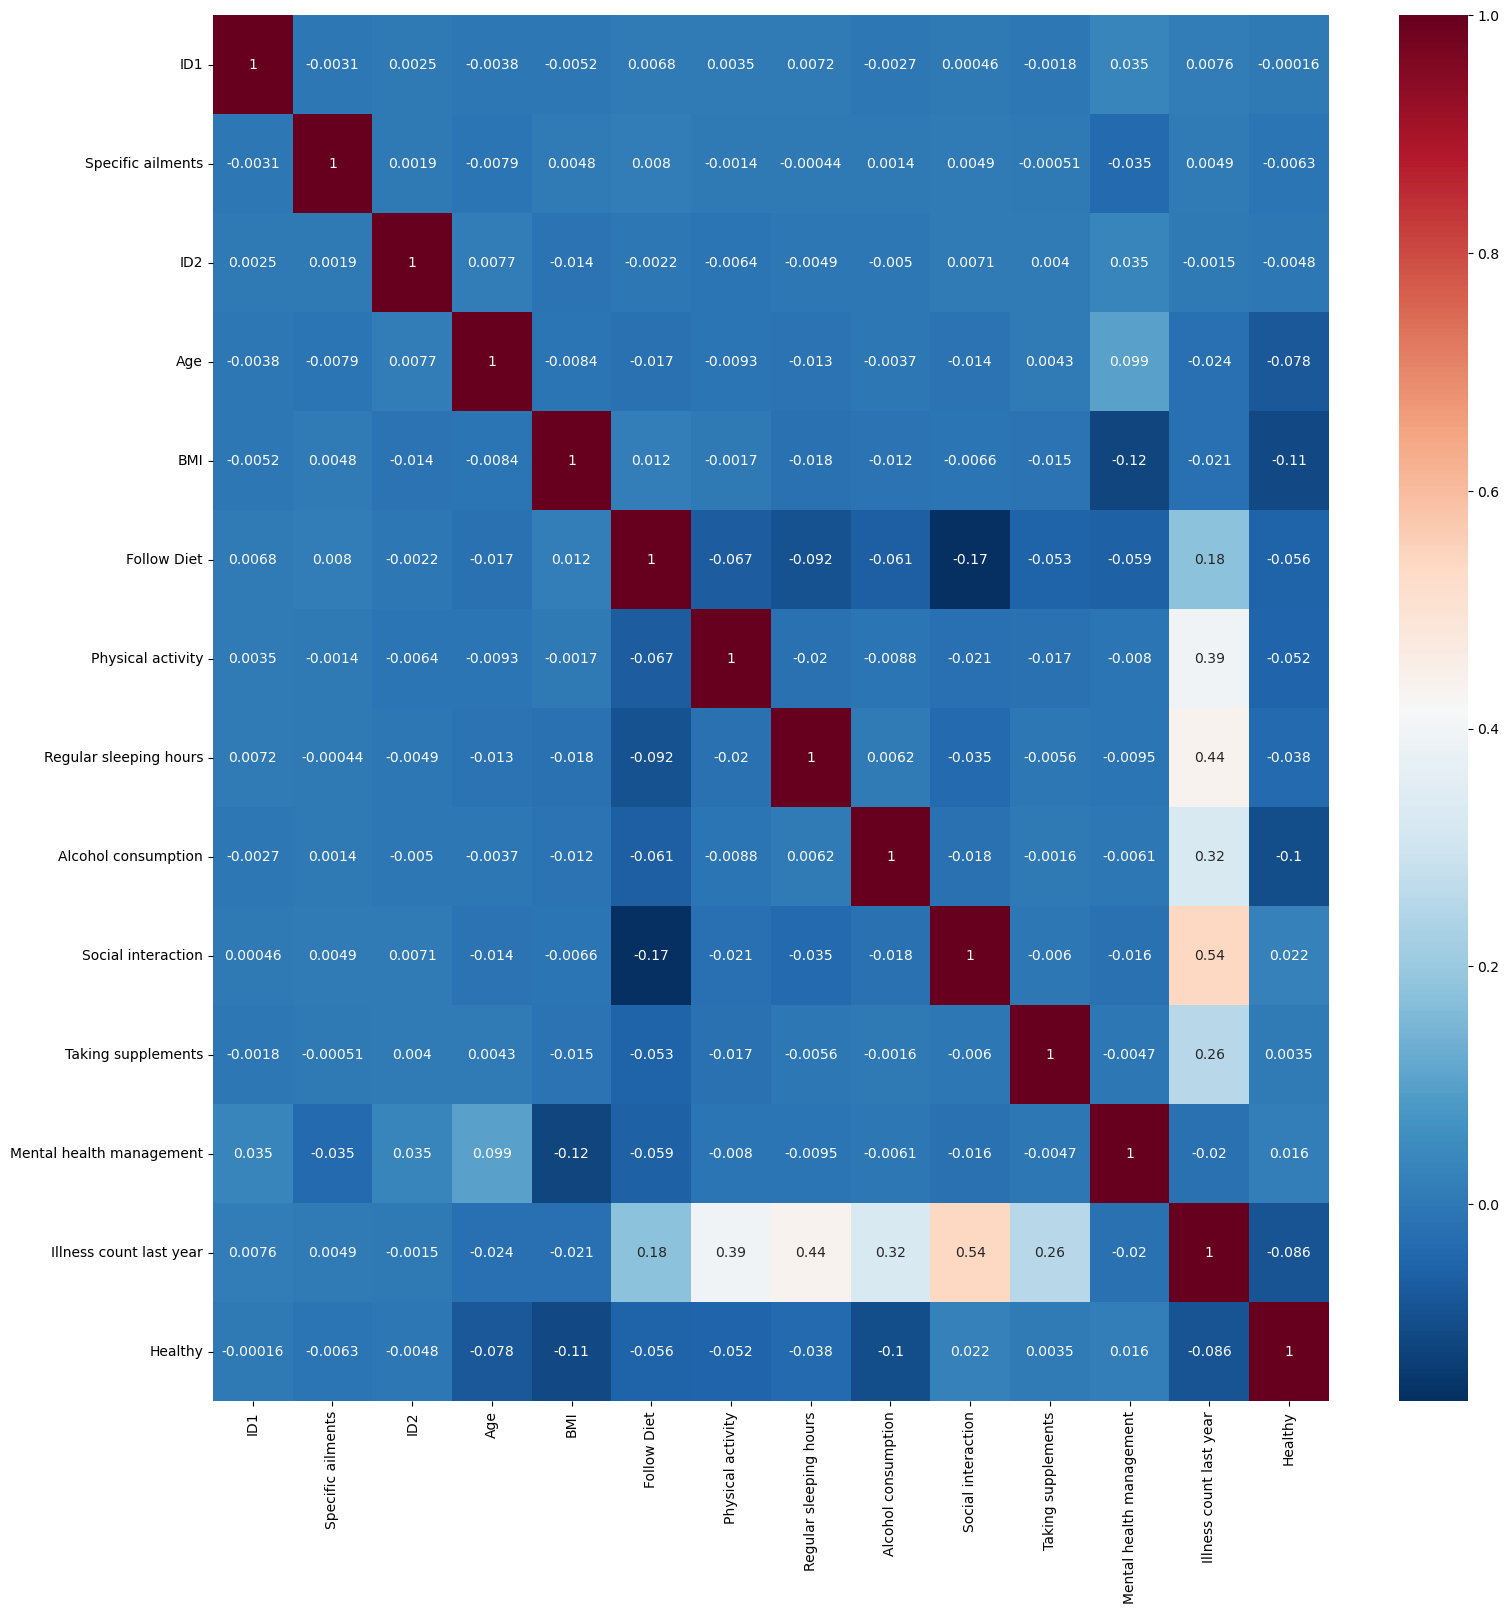

In [109]:
# Create a heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(train.corr(), cmap="RdBu_r", annot=True)
plt.show()

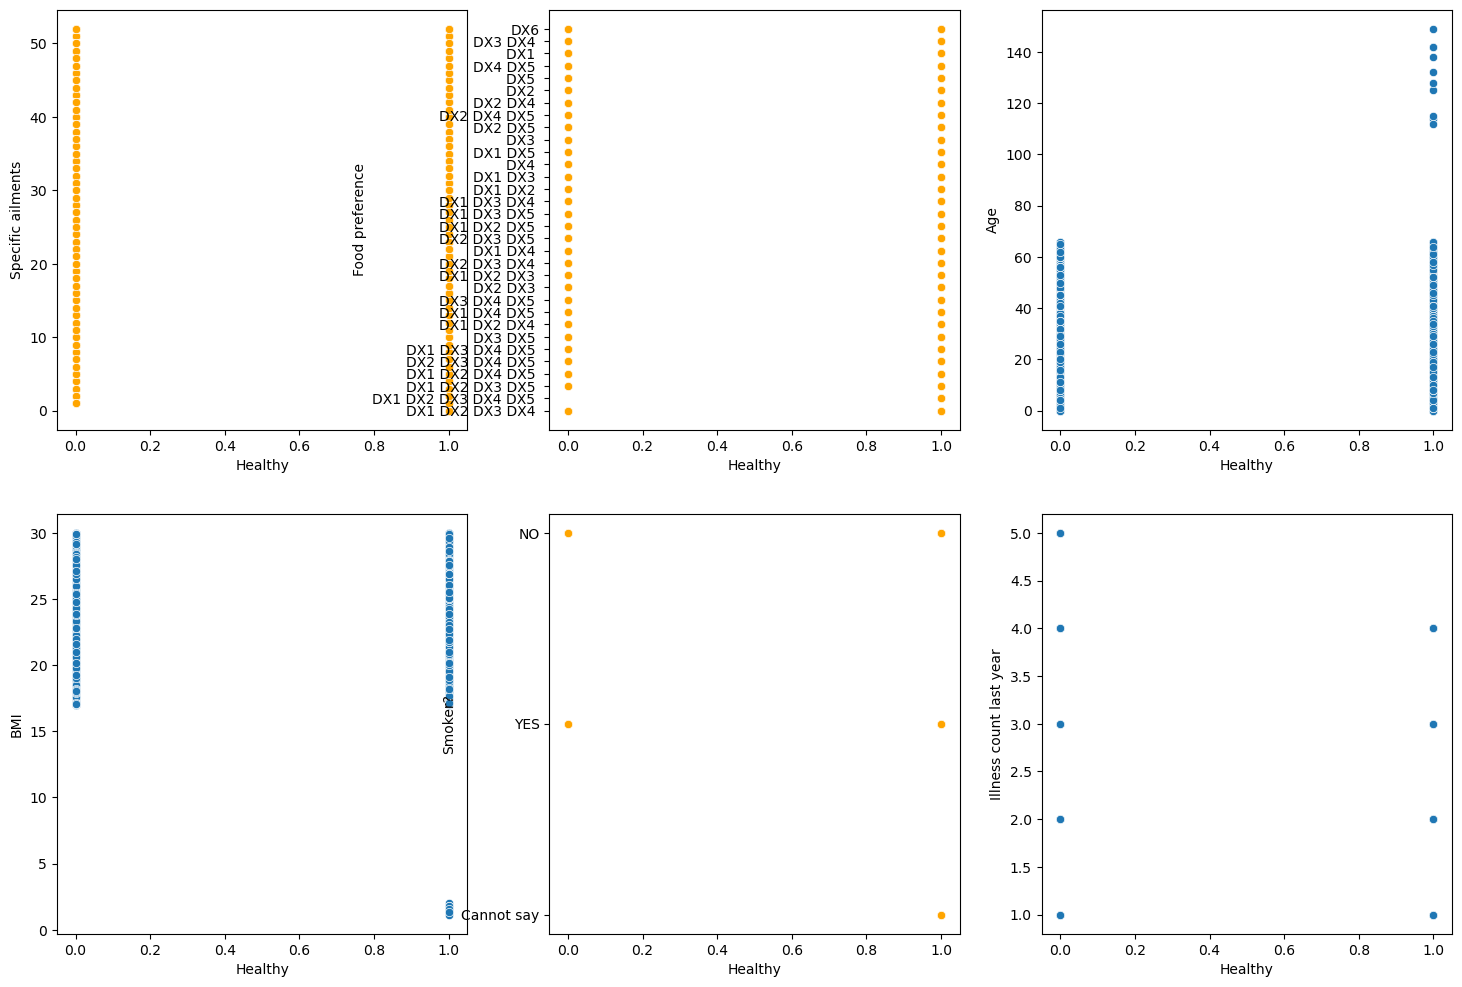

In [110]:
train['ID'] = np.arange(train.shape[0])
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (18,12))

sns.scatterplot(x='Healthy', y='Specific ailments', data=train, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='Healthy', y='Food preference', data=train, ax=ax[0][1], color='orange')
sns.scatterplot(x='Healthy', y='Age', data=train, ax=ax[0][2])
sns.scatterplot(x='Healthy', y='BMI', data=train, ax=ax[1][0])
sns.scatterplot(x='Healthy', y='Smoker?', data=train, ax=ax[1][1], color= 'orange')
sns.scatterplot(x='Healthy', y='Illness count last year', data=train, ax=ax[1][2]) 
train = train.drop('ID', axis=1)

In [111]:
# print null values
train.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference               10
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  973
Physical activity            973
Regular sleeping hours       973
Alcohol consumption          973
Social interaction           973
Taking supplements           973
Mental health management     973
Illness count last year      973
Healthy                        0
dtype: int64

In [112]:
# Remove unnecessary columns from the dataset
train.drop('ID1', axis=1,inplace=True)
train.drop('ID2', axis=1,inplace=True)
train.drop(['Any heriditary condition?'], axis=1, inplace=True)
train.drop(['Mental health management'], axis=1, inplace=True)

test.drop('ID1', axis=1,inplace=True)
test.drop('ID2', axis=1,inplace=True)
test.drop(['Any heriditary condition?'], axis=1, inplace=True)
test.drop(['Mental health management'], axis=1, inplace=True)

In [113]:
# Checking categories in object columns so that they can be converted to numerical
print(train['Food preference'].value_counts())
print(train['Smoker?'].value_counts())
print(train['Living in?'].value_counts())
print(train['Age'].value_counts())


DX6                     9639
DX5                     2167
DX2                     2128
DX4                     2099
DX3                     2072
DX1                     2063
DX1 DX2                  480
DX2 DX4                  476
DX3 DX4                  471
DX1 DX3                  461
DX4 DX5                  459
DX2 DX5                  459
DX2 DX3                  452
DX1 DX5                  450
DX3 DX5                  443
DX1 DX4                  437
DX1 DX2 DX5              116
DX1 DX3 DX4              113
DX1 DX2 DX3              110
DX1 DX2 DX4              110
DX3 DX4 DX5              109
DX2 DX3 DX5              105
DX1 DX3 DX5               98
DX2 DX4 DX5               98
DX2 DX3 DX4               90
DX1 DX4 DX5               89
DX1 DX3 DX4 DX5           27
DX2 DX3 DX4 DX5           26
DX1 DX2 DX4 DX5           23
DX1 DX2 DX3 DX4           20
DX1 DX2 DX3 DX5           16
DX1 DX2 DX3 DX4 DX5        4
Name: Food preference, dtype: int64
NO            14938
YES           10

In [114]:
# Specify the values to drop from the column
# Create a mask to select rows where the value in the column is not in the list of values to drop
# Apply the mask to the DataFrame to keep only the selected rows
# The tilde symbol ~ is used as a bitwise NOT operator to invert a boolean mask.

values_to_drop = ['DX1 DX2 DX3 DX4 DX5 ', 'DX1 DX3 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX4 DX5 ', 'DX1 DX2 DX3 DX4 ', 'DX1 DX2 DX3 DX5 ']
mask = ~train['Food preference'].isin(values_to_drop)
train = train[mask]

values_to_drop1 = ['Cannot say']
mask1 = ~train['Smoker?'].isin(values_to_drop1)
train = train[mask1]



In [115]:
####         Test Dataset            ####

# Create a dictionary to map old values to new values
replace_dict = {
    'DX1 DX2 DX3 DX4 DX5 ': 'DX1 ',
    'DX1 DX3 DX4 DX5 ': 'DX1 DX3 DX4 ',
    'DX2 DX3 DX4 DX5 ': 'DX2 DX3 DX4 ',
    'DX1 DX2 DX4 DX5 ': 'DX1 DX2 DX4 ',
    'DX1 DX2 DX3 DX4 ': 'DX1 DX2 ',
    'DX1 DX2 DX3 DX5 ': 'DX1 DX2 DX3 '}

# Replace the values in the column using the replace method
test['Food preference'] = test['Food preference'].replace(replace_dict)

# Create a boolean mask to select rows where the 'Smoker?' column is 'Cannot say' and # Use the .loc method to replace the values in the selected rows
mask = test['Smoker?'] == 'Cannot say'
test.loc[mask, 'Smoker?'] = 'NO'


# replace_dict1 = {"Cannot say": "NO"}
# test['Smoker?'] = test['Smoker?'].replace(replace_dict1)

# values_to_drop0 = ['DX1 DX2 DX3 DX4 DX5 ', 'DX1 DX3 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX4 DX5 ', 'DX1 DX2 DX3 DX4 ', 'DX1 DX2 DX3 DX5 ']
# mask0 = ~test['Food preference'].isin(values_to_drop0)
# test = test[mask0]

# values_to_drop2 = ['Cannot say']
# mask2 = ~test['Smoker?'].isin(values_to_drop2)
# test = test[mask2]

In [116]:
# train['Food preference'].drop([['DX1 DX2 DX3 DX4 DX5 ', 'DX1 DX3 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX4 DX5 ', 'DX1 DX2 DX3 DX4 ', 'DX1 DX2 DX3 DX5 ']], axis=0, inplace=True)

In [117]:
columns_to_encode = ['Food preference', 'Smoker?', 'Living in?']
num_features = ['Specific ailments', 'Age', 'BMI']

ct = ColumnTransformer([('encoder', OneHotEncoder(), columns_to_encode), ("StdScaler", StandardScaler(), num_features)], remainder='passthrough')
train_encoded = pd.DataFrame(ct.fit_transform(train))

# Get generated column names
new_columns = ct.get_feature_names_out()

# Replace generated column names with original column names
train_encoded.columns = new_columns


In [118]:
null_col = ['remainder__Follow Diet', 'remainder__Physical activity', 'remainder__Regular sleeping hours', 
'remainder__Alcohol consumption', 'remainder__Social interaction', 'remainder__Taking supplements', 
'remainder__Illness count last year']
train_encoded.dropna(subset=null_col, inplace=True)
# test_encoded.dropna(subset=null_col, inplace=True)

In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Specific ailments        6480 non-null   int64  
 1   Food preference          6477 non-null   object 
 2   Age                      6480 non-null   int64  
 3   BMI                      6480 non-null   float64
 4   Smoker?                  6480 non-null   object 
 5   Living in?               6480 non-null   object 
 6   Follow Diet              6218 non-null   float64
 7   Physical activity        6218 non-null   float64
 8   Regular sleeping hours   6218 non-null   float64
 9   Alcohol consumption      6218 non-null   float64
 10  Social interaction       6218 non-null   float64
 11  Taking supplements       6218 non-null   float64
 12  Illness count last year  6218 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 658.2+ KB


In [120]:
test.isnull().sum()

Specific ailments            0
Food preference              3
Age                          0
BMI                          0
Smoker?                      0
Living in?                   0
Follow Diet                262
Physical activity          262
Regular sleeping hours     262
Alcohol consumption        262
Social interaction         262
Taking supplements         262
Illness count last year    262
dtype: int64

In [121]:
# replace null values in dataset with average values using sklearn's SimpleImputer
from sklearn.impute import SimpleImputer

null_col = ['Food preference', 'Follow Diet', 'Physical activity', 'Regular sleeping hours', 
'Alcohol consumption', 'Social interaction', 'Taking supplements', 
'Illness count last year']

# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the DataFrame and transform it
imputed_data = imputer.fit_transform(test[null_col])

# Convert the result back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=test[null_col].columns)

# Add the remaining columns of the original DataFrame that did not contain missing values
imputed_df = pd.concat([imputed_df, test.drop(null_col, axis=1)], axis=1)

# Rearrange the columns to match the order of the original DataFrame
test = imputed_df[test.columns]

In [122]:
null_col1 = ['Follow Diet', 'Physical activity', 'Regular sleeping hours', 
'Alcohol consumption', 'Social interaction', 'Taking supplements', 
'Illness count last year']
test[null_col1] = test[null_col1].apply(pd.to_numeric)

In [123]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Specific ailments        6480 non-null   int64  
 1   Food preference          6480 non-null   object 
 2   Age                      6480 non-null   int64  
 3   BMI                      6480 non-null   float64
 4   Smoker?                  6480 non-null   object 
 5   Living in?               6480 non-null   object 
 6   Follow Diet              6480 non-null   float64
 7   Physical activity        6480 non-null   float64
 8   Regular sleeping hours   6480 non-null   float64
 9   Alcohol consumption      6480 non-null   float64
 10  Social interaction       6480 non-null   float64
 11  Taking supplements       6480 non-null   float64
 12  Illness count last year  6480 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 658.2+ KB


In [124]:
test.head()

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Illness count last year
0,2,DX6,38,18.879331,YES,URBAN,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,5,DX1,46,21.231991,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,37,DX4,11,17.867876,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,44,DX5,10,26.886096,NO,RURAL,1.0,0.0,0.0,1.0,0.0,0.0,2.0
4,37,DX3 DX4,3,23.362746,NO,RURAL,0.0,1.0,0.0,1.0,0.0,0.0,2.0


In [125]:
test.isnull().sum()

Specific ailments          0
Food preference            0
Age                        0
BMI                        0
Smoker?                    0
Living in?                 0
Follow Diet                0
Physical activity          0
Regular sleeping hours     0
Alcohol consumption        0
Social interaction         0
Taking supplements         0
Illness count last year    0
dtype: int64

In [126]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Specific ailments        6480 non-null   int64  
 1   Food preference          6480 non-null   object 
 2   Age                      6480 non-null   int64  
 3   BMI                      6480 non-null   float64
 4   Smoker?                  6480 non-null   object 
 5   Living in?               6480 non-null   object 
 6   Follow Diet              6480 non-null   float64
 7   Physical activity        6480 non-null   float64
 8   Regular sleeping hours   6480 non-null   float64
 9   Alcohol consumption      6480 non-null   float64
 10  Social interaction       6480 non-null   float64
 11  Taking supplements       6480 non-null   float64
 12  Illness count last year  6480 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 658.2+ KB


In [127]:
test['Follow Diet'].value_counts()

1.0    5856
0.0     624
Name: Follow Diet, dtype: int64

In [128]:
# test_encoded = test.loc[:, test.columns != 'remainder__Healthy']

test['Healthy'] = np.random.rand(len(test))
test_encoded = pd.DataFrame(ct.transform(test))
test_encoded.columns = new_columns
test_encoded.drop('remainder__Healthy', axis=1, inplace=True)

In [129]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Specific ailments        6480 non-null   int64  
 1   Food preference          6480 non-null   object 
 2   Age                      6480 non-null   int64  
 3   BMI                      6480 non-null   float64
 4   Smoker?                  6480 non-null   object 
 5   Living in?               6480 non-null   object 
 6   Follow Diet              6480 non-null   float64
 7   Physical activity        6480 non-null   float64
 8   Regular sleeping hours   6480 non-null   float64
 9   Alcohol consumption      6480 non-null   float64
 10  Social interaction       6480 non-null   float64
 11  Taking supplements       6480 non-null   float64
 12  Illness count last year  6480 non-null   float64
 13  Healthy                  6480 non-null   float64
dtypes: float64(9), int64(2),

In [130]:
# seperate the target variable
y_train=train_encoded['remainder__Healthy']
X_train=train_encoded.drop(['remainder__Healthy'], axis=1)
X_test=test_encoded

In [131]:
# # # create an instance of QuantileTransformer
# scaler = QuantileTransformer(n_quantiles=10, random_state=0)  

# # # fit and transform the selected columns of train and test
# xtrain = scaler.fit_transform(X_train)
# test = scaler.transform(X_test)

In [132]:
# # create an instance of PowerTransformer
# scaler = PowerTransformer() # standardize=False

# # # fit and transform the selected columns of train and test
# xtrain = scaler.fit_transform(X_train)
# test = scaler.transform(X_test)

In [133]:


# # Create an Evaluate Function to give all metrics after model Training
# def evaluate_model(true, predicted):
#     accuracy = accuracy_score(true, predicted)
#     precision = precision_score(true, predicted, average='weighted')
#     recall = recall_score(true, predicted, average='weighted')
#     f1 = f1_score(true, predicted, average='weighted')
#     return accuracy, precision, recall, f1

In [134]:
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

# base_estimator = DecisionTreeClassifier(max_features='auto')

# models = {
#     "Logistic Regression": LogisticRegression(),
#     "K-Neighbors Classifier": KNeighborsClassifier(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest Classifier": RandomForestClassifier(),
#     "svm": SVC(),
#     "gnb": GaussianNB(),
#     "lda": LinearDiscriminantAnalysis(),
#     "lgbm":LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#                importance_type='split', learning_rate=0.1, max_depth=-1,
#                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
#                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
#                random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
#                subsample=1.0, subsample_for_bin=200000, subsample_freq=0), 
#     "ada" : AdaBoostClassifier(base_estimator=base_estimator, n_estimators=30, learning_rate=0.1),
#     "gbc": GradientBoostingClassifier(), 
#     "xgb": xgb.XGBClassifier()
# }


# model_list = []
# accuracy_list = []
# f1_list = []

# # Train model
# for i in range(len(list(models))):
#     model = list(models.values())[i]
#     model.fit(X_train, y_train) 

#     # Make predictions
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)
    
#     # Evaluate Train and Test dataset
#     model_train_accuracy , model_train_precision, model_train_recall, model_train_f1 = evaluate_model(y_train, y_train_pred)

#     model_test_accuracy , model_test_precision, model_test_recall, model_test_f1 = evaluate_model(y_test, y_test_pred)

    
#     print(list(models.keys())[i])
#     model_list.append(list(models.keys())[i])
    
#     print('Model performance for Training set')
#     print("- Accuracy: {:.4f}".format(model_train_accuracy))
#     print("- Precision: {:.4f}".format(model_train_precision))
#     print("- Recall: {:.4f}".format(model_train_recall))
#     print("- F1 Score: {:.4f}".format(model_train_f1))

#     print('----------------------------------')
    
#     print('Model performance for Test set')
#     print("- Accuracy: {:.4f}".format(model_test_accuracy))
#     print("- Precision: {:.4f}".format(model_test_precision))
#     print("- Recall: {:.4f}".format(model_test_recall))
#     print("- F1 Score: {:.4f}".format(model_test_f1))
    
#     accuracy_list.append(model_test_accuracy)
#     f1_list.append(model_test_f1)
    
#     print('='*35)
#     print('\n')



c:\Users\shrig\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.7277
- Precision: 0.7220
- Recall: 0.7277
- F1 Score: 0.7193
----------------------------------
Model performance for Test set
- Accuracy: 0.7288
- Precision: 0.7230
- Recall: 0.7288
- F1 Score: 0.7211


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.8439
- Precision: 0.8428
- Recall: 0.8439
- F1 Score: 0.8429
----------------------------------
Model performance for Test set
- Accuracy: 0.7649
- Precision: 0.7636
- Recall: 0.7649
- F1 Score: 0.7641


Decision Tree
Model performance for Training set
- Accuracy: 0.9995
- Precision: 0.9995
- Recall: 0.9995
- F1 Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.7736
- Precision: 0.7747
- Recall: 0.7736
- F1 Score: 0.7741


Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9994
- Precision: 0.9994
- Recall: 0.9994
- F1 Score: 0.9994
----------------------------------
Model performa

c:\Users\shrig\.conda\envs\notebook\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ada
Model performance for Training set
- Accuracy: 0.9995
- Precision: 0.9995
- Recall: 0.9995
- F1 Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.7955
- Precision: 0.7952
- Recall: 0.7955
- F1 Score: 0.7954


gbc
Model performance for Training set
- Accuracy: 0.8330
- Precision: 0.8316
- Recall: 0.8330
- F1 Score: 0.8315
----------------------------------
Model performance for Test set
- Accuracy: 0.8170
- Precision: 0.8154
- Recall: 0.8170
- F1 Score: 0.8157


xgb
Model performance for Training set
- Accuracy: 0.9035
- Precision: 0.9031
- Recall: 0.9035
- F1 Score: 0.9032
----------------------------------
Model performance for Test set
- Accuracy: 0.8281
- Precision: 0.8272
- Recall: 0.8281
- F1 Score: 0.8275




# Result

	Model Name	                Accuracy
	Random Forest Classifier	0.815501
	svm	                        0.807444
	Decision Tree	            	0.778279
	K-Neighbors Classifier	    	0.775862
	Logistic Regression	        0.728005
	lda	                        0.725427
	gnb	                        0.520947

In [135]:
# pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

,Model Name,Accuracy
10,xgb,0.828070
7,lgbm,0.826942
9,gbc,0.816951
3,Random Forest Classifier,0.808895
4,svm,0.796165
8,ada,0.795520
2,Decision Tree,0.773606
1,K-Neighbors Classifier,0.764905
0,Logistic Regression,0.728811
6,lda,0.727844


In [136]:
# pd.DataFrame(list(zip(model_list, f1_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

,Model Name,Accuracy
10,xgb,0.827540
7,lgbm,0.826927
9,gbc,0.815748
3,Random Forest Classifier,0.808679
8,ada,0.795353
4,svm,0.794624
2,Decision Tree,0.774078
1,K-Neighbors Classifier,0.764114
0,Logistic Regression,0.721090
6,lda,0.720868


In [218]:
from lightgbm import LGBMClassifier

LGBMC = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [219]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

In [220]:



# Create a DecisionTreeClassifier as the base estimator
base_estimator = DecisionTreeClassifier(max_features='auto')

# Create an AdaBoostClassifier with the DecisionTreeClassifier as the base estimator
ada = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=30,
    learning_rate=0.1)


In [221]:

# Fit the LGBMC on the training data
LGBMC.fit(X_train, y_train)

# Make predictions on the test data
y_pred = LGBMC.predict(X_test)


In [222]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(LGBMC, X_train, y_train, cv=10, scoring='f1')
print("Cross-validation scores:", score)
print("Mean cross-validation score:", score.mean())


Cross-validation scores: [0.87222401 0.86545925 0.87026333 0.8590604  0.86580645 0.87164565
 0.87406928 0.87435567 0.86288493 0.86897444]
Mean cross-validation score: 0.868474340983641


In [223]:
# # fitting the same model
# y_pred = LGBMC.predict_proba(X_test)[:,1]
# y_preed=(y_pred >= 0.2033).astype(int)
# eval_df = test_encoded.copy()
# eval_df['predictions'] = y_preed
# eval_df.to_csv('submission.csv' , index=False)

In [224]:
# # fitting the same model
# y_pred = y_pred1 #.astype(bool)
# y_pred

In [225]:
submission = pd.DataFrame(columns=['predictions'])
submission["predictions"] = [i for i in y_pred.astype(int)]
submission.to_csv("submission.csv", index=False)
submission

,predictions
0,0
1,1
2,1
3,1
4,1
...,...
6475,0
6476,1
6477,1
6478,0


In [226]:
submission.value_counts()

predictions
1              4045
0              2435
dtype: int64